In [223]:
#Import the necessary libraries then load the Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

breast_cancer = load_breast_cancer()

In [224]:
x= breast_cancer.data
y= breast_cancer.target

In [225]:
#Display dataset info for checking
print("Breast Cancer Dataset Info")
print("==========================")
print("Samples x Features", x.shape)
print("Target shape", y.shape)
print("Target names", breast_cancer.target_names)

Breast Cancer Dataset Info
Samples x Features (569, 30)
Target shape (569,)
Target names ['malignant' 'benign']


In [226]:
#Split the data for training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

print("\n=== Split Sizes ===")
print("x_train:", x_train.shape, "y_train.shape", y_train.shape)
print("x_test:", x_test.shape, "y_test:", y_test.shape)


=== Split Sizes ===
x_train: (455, 30) y_train.shape (455,)
x_test: (114, 30) y_test: (114,)


In [227]:
#Create/Train GaussianNB Model
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

print("Trained GaussianNB Model on:", x_train.shape[0], "samples and", x_train.shape[1], "features")

Trained GaussianNB Model on: 455 samples and 30 features


In [228]:
#Predict / Guage Accuracy
y_pred = nb.predict(x_test)

train_acc = nb.score(x_train, y_train)
test_acc = nb.score(x_test, y_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

print("Accuracy:", accuracy_score(y_test, y_pred))

Training Accuracy: 0.9384615384615385
Testing Accuracy: 0.9385964912280702
Accuracy: 0.9385964912280702


In [229]:
#Confusion Matrix/ Class Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print( "\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))

Confusion Matrix:
[[32  6]
 [ 1 75]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.84      0.90        38
      benign       0.93      0.99      0.96        76

    accuracy                           0.94       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



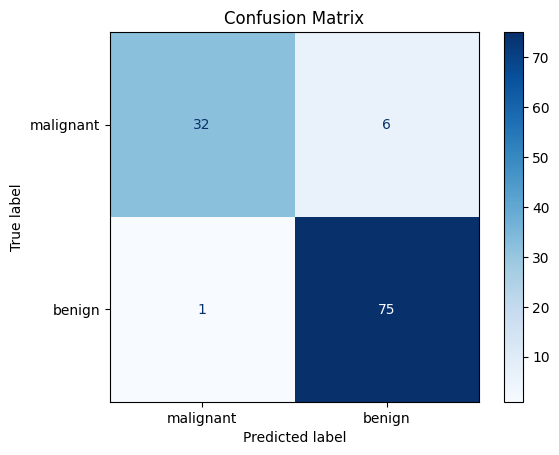

In [230]:
#Visualize the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [240]:
#K-Fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=11)
scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)

print("Cross-validation scores:", scores)
print("\nMean accuracy:", np.mean(scores))

Cross-validation scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]

Mean accuracy: 0.9384711779448622


In [257]:
#Create dictionary for other models
from sklearn.multiclass import OneVsRestClassifier

estimators = {'GaussianNB':GaussianNB(),
  'KNeighborsClassifier':KNeighborsClassifier(),
  'LogisticRegression':OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=10000)),
  'SVC':SVC(gamma='scale')
}

In [258]:
#Run through each model and compare
print("\n=== Model Comparison ===")
for name, model in estimators.items():
  cv_scores = cross_val_score(estimator=model, X=x, y=y, cv=kfold)
  model.fit(x_train, y_train)
  test_acc = model.score(x_test, y_test)

  print(name, "CV Mean", round(cv_scores.mean(), 3))
  print(name, "CV Std", round(cv_scores.std(), 3))
  print(name, "Test Accuracy", round(test_acc, 3))


=== Model Comparison ===
GaussianNB CV Mean 0.938
GaussianNB CV Std 0.028
GaussianNB Test Accuracy 0.939
KNeighborsClassifier CV Mean 0.928
KNeighborsClassifier CV Std 0.02
KNeighborsClassifier Test Accuracy 0.947
LogisticRegression CV Mean 0.951
LogisticRegression CV Std 0.03
LogisticRegression Test Accuracy 0.956
SVC CV Mean 0.919
SVC CV Std 0.035
SVC Test Accuracy 0.93
